In [1]:
import mynn as nn
from draw_tools.plot import plot

import numpy as np
from struct import unpack
import gzip
import matplotlib.pyplot as plt
import pickle

# fixed seed for experiment
np.random.seed(309)

train_images_path = r'.\dataset\MNIST\train-images-idx3-ubyte.gz'
train_labels_path = r'.\dataset\MNIST\train-labels-idx1-ubyte.gz'

with gzip.open(train_images_path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        train_imgs=np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28*28)
    
with gzip.open(train_labels_path, 'rb') as f:
        magic, num = unpack('>2I', f.read(8))
        train_labs = np.frombuffer(f.read(), dtype=np.uint8)


# choose 10000 samples from train set as validation set.
idx = np.random.permutation(np.arange(num))
# save the index.
with open('idx.pickle', 'wb') as f:
        pickle.dump(idx, f)
train_imgs = train_imgs[idx]
train_labs = train_labs[idx]
valid_imgs = train_imgs[:10000]
valid_labs = train_labs[:10000]
train_imgs = train_imgs[10000:]
train_labs = train_labs[10000:]

# normalize from [0, 255] to [0, 1]
train_imgs = train_imgs / train_imgs.max()
valid_imgs = valid_imgs / valid_imgs.max()

def train_model(nHidden=[128], lr=1.0, epochs=2):
    # 模型结构：输入层 + 隐藏层 + 输出层
    size_list = [train_imgs.shape[1]] + nHidden + [10]
    lambda_list = [1e-4] * (len(nHidden) + 1)  # 每层一个lambda
    
    # 初始化组件
    model = nn.models.Model_MLP(size_list, 'ReLU', lambda_list, dropout_rates=None)
    opt = nn.optimizer.MomentGD(init_lr=lr, model=model,mu=0.9)
    scheduler = nn.lr_scheduler.MultiStepLR(opt, milestones=[800, 2400, 4000], gamma=0.5)
    loss_fn = nn.op.MultiCrossEntropyLoss(model=model)
    loss_fn = loss_fn.cancel_soft_max()
    
    
    # 训练运行器
    trainer = nn.runner.RunnerM(
        model=model,
        optimizer=opt,
        metric=nn.metric.accuracy,
        loss_fn=loss_fn,
        batch_size=32,
        scheduler=scheduler
    )
    
    # 执行训练
    trainer.train(
        train_set=[train_imgs, train_labs],
        dev_set=[valid_imgs, valid_labs],
        num_epochs=epochs,
        log_iters=100,
        # save_dir=f'./saved_models/hidden_{"_".join(map(str, nHidden))}'
    )
    
    # 绘制训练曲线
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].plot(trainer.train_loss, label='Train Loss')
    axes[0].plot(trainer.dev_loss, label='Val Loss')
    axes[0].set_title('Loss Curve')
    axes[0].legend()
    
    axes[1].plot(trainer.train_scores, label='Train Acc')
    axes[1].plot(trainer.dev_scores, label='Val Acc')
    axes[1].set_title('Accuracy Curve')
    axes[1].legend()
    
    plt.show()
    
    return trainer

## 调用 `cancel_soft_max()` 方法，即未添加 `softmax` 层

d:\File\大三下\神经网络深度学习\pj1\code\mynn\op.py:173: RuntimeWarning: invalid value encountered in log
  loss = -np.sum(y_one_hot * np.log(self.probs + 1e-10)) / self.batch_size


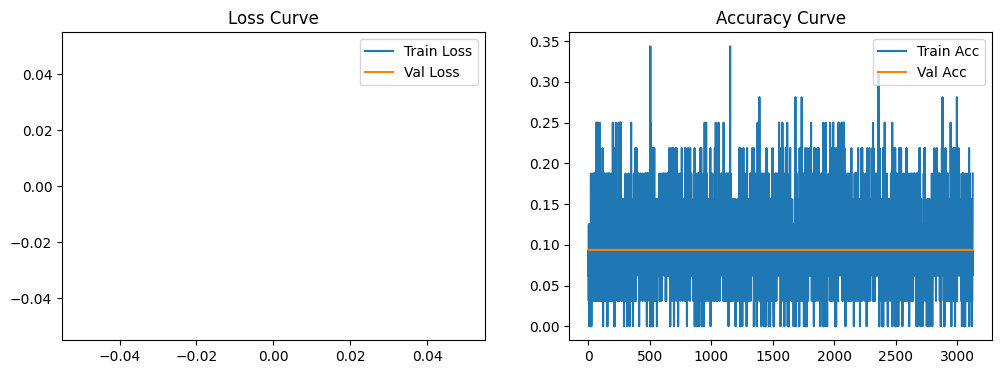

The best train accuracy: 0.34375
The best validation accuracy: 0.0941


In [2]:
trainer1 = train_model()
print("The best train accuracy:", max(trainer1.train_scores))
print("The best validation accuracy:", max(trainer1.dev_scores))

In [3]:
print(trainer1.train_loss)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

## 不调用 `cancel_soft_max()` 方法，即添加 `softmax` 层

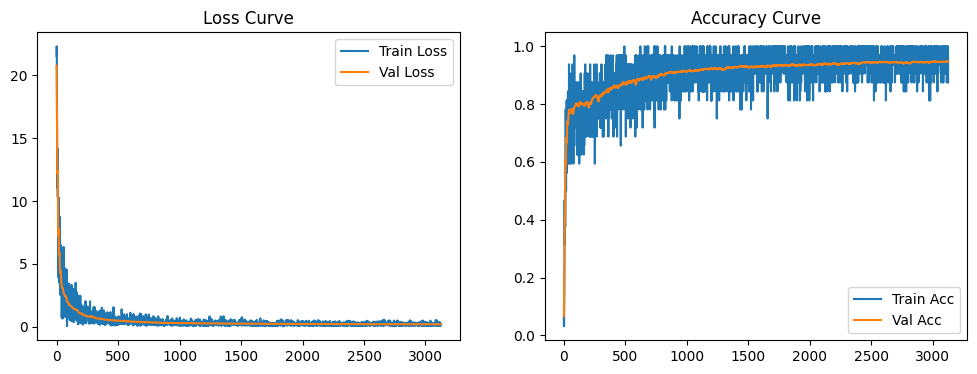

The best train accuracy: 1.0
The best validation accuracy: 0.9488


In [5]:
trainer2 = train_model()
print("The best train accuracy:", max(trainer2.train_scores))
print("The best validation accuracy:", max(trainer2.dev_scores))